Практична робота №4

Баш Анастасія
МІТ-31


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
import warnings
warnings.filterwarnings("ignore")

Завдання №1
Завдання для бінарної класифікації (Binary Classification):

Використовуйте набір даних "classification_dataset.csv" для бінарної класифікації.

In [17]:
data_binary = pd.read_csv("classification_dataset.csv")

Розділіть дані на навчальний та тестовий набори.

In [18]:
X_binary = data_binary.drop('Target', axis=1)
y_binary = data_binary['Target']
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і AUC-ROC.

In [19]:
# Навчання класифікатора (логістична регресія)
model_binary = LogisticRegression()
model_binary.fit(X_train_binary, y_train_binary)

# Прогнозування на тестовому наборі
y_pred_binary = model_binary.predict(X_test_binary)

# Оцінка моделі
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
precision_binary = precision_score(y_test_binary, y_pred_binary)
recall_binary = recall_score(y_test_binary, y_pred_binary)
f1_binary = f1_score(y_test_binary, y_pred_binary)
roc_auc_binary = roc_auc_score(y_test_binary, y_pred_binary)
conf_matrix_binary = confusion_matrix(y_test_binary, y_pred_binary)

# Виведення результатів
print(f'Accuracy: {accuracy_binary:.4f}')
print(f'Precision: {precision_binary:.4f}')
print(f'Recall: {recall_binary:.4f}')
print(f'F1 Score: {f1_binary:.4f}')
print(f'ROC AUC Score: {roc_auc_binary:.4f}')
print('Confusion Matrix:')
print(conf_matrix_binary)

Accuracy: 0.8750
Precision: 0.7727
Recall: 1.0000
F1 Score: 0.8718
ROC AUC Score: 0.8913
Confusion Matrix:
[[18  5]
 [ 0 17]]


Візуалізуйте матрицю плутанини та навчіться розпізнавати типи помилок.

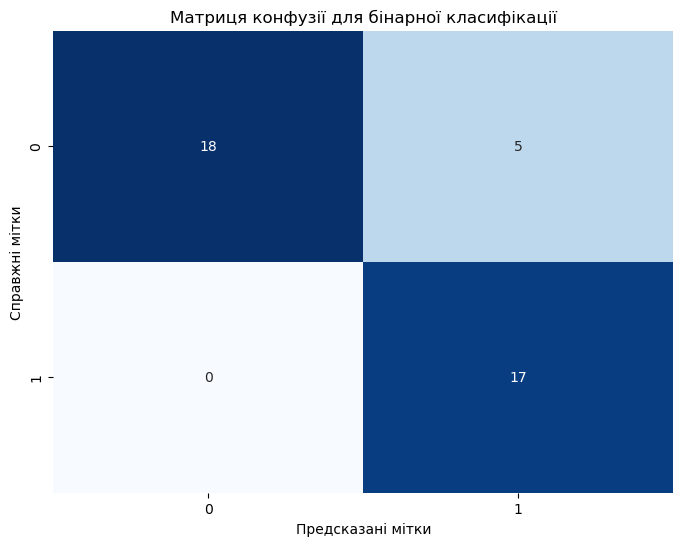

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_binary, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Предсказані мітки')
plt.ylabel('Справжні мітки')
plt.title('Матриця конфузії для бінарної класифікації')
plt.show()

Завдання №2
Завдання для мультикласової класифікації (Multiclass Classification):

Використовуйте набір даних "multiclass_dataset.csv" для мультикласової класифікації.

In [21]:
data_multiclass = pd.read_csv("multiclass_dataset.csv")

Розділіть дані на навчальний та тестовий набори.

In [22]:
X_multiclass = data_multiclass.drop('Target', axis=1)
y_multiclass = data_multiclass['Target']
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(X_multiclass, y_multiclass, test_size=0.2, random_state=42)

Навчіть класифікатор (наприклад, Random Forest або нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і матриця плутанини.

In [23]:

# Навчання класифікатора (Random Forest)
model_multiclass = RandomForestClassifier()
model_multiclass.fit(X_train_multiclass, y_train_multiclass)

# Прогнозування на тестовому наборі
y_pred_multiclass = model_multiclass.predict(X_test_multiclass)

# Оцінка моделі
accuracy_multiclass = accuracy_score(y_test_multiclass, y_pred_multiclass)
precision_multiclass = precision_score(y_test_multiclass, y_pred_multiclass, average='weighted')
recall_multiclass = recall_score(y_test_multiclass, y_pred_multiclass, average='weighted')
f1_multiclass = f1_score(y_test_multiclass, y_pred_multiclass, average='weighted')
conf_matrix_multiclass = confusion_matrix(y_test_multiclass, y_pred_multiclass)

# Виведення результатів
print(f'Accuracy: {accuracy_multiclass:.4f}')
print(f'Precision: {precision_multiclass:.4f}')
print(f'Recall: {recall_multiclass:.4f}')
print(f'F1 Score: {f1_multiclass:.4f}')

print('Confusion Matrix:')
print(conf_matrix_multiclass)

Accuracy: 0.7000
Precision: 0.7211
Recall: 0.7000
F1 Score: 0.6894
Confusion Matrix:
[[ 4  1  2  0]
 [ 4  3  0  1]
 [ 1  0 10  3]
 [ 0  0  0 11]]


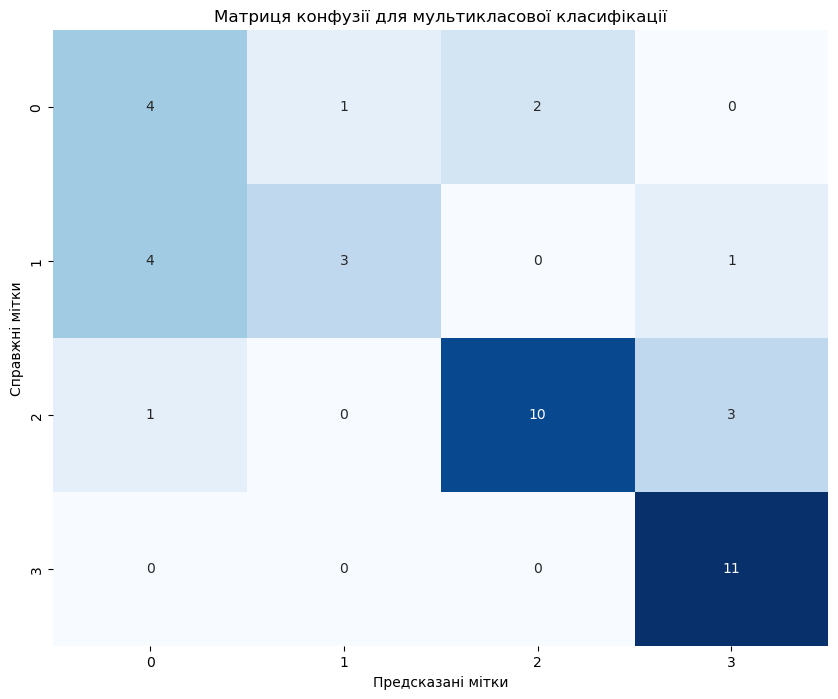

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_multiclass, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Предсказані мітки')
plt.ylabel('Справжні мітки')
plt.title('Матриця конфузії для мультикласової класифікації')
plt.show()


Завдання №3
Завдання для мультилейбл класифікації (Multilabel Classification):

Використовуйте набір даних "multilabel_dataset.csv" для мультилейбл класифікації.

In [15]:
data = pd.read_csv('multilabel_dataset.csv')

X = data[['Feature1', 'Feature2', 'Feature3']]
y = data[['Label1', 'Label2', 'Label3', 'Label4']]

Розділіть дані на навчальний та тестовий набори.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
param_grid = {
    'estimator__n_estimators': [100, 200, 300],  # Кількість дерев у класифікаторі
    'estimator__max_depth': [3, 4, 5],  # Глибина дерева
    'estimator__learning_rate': [0.01, 0.1, 0.2]  # Швидкість навчання
}

Навчіть класифікатор для прогнозування мультилейблів (наприклад, використовуючи багатошарову нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла.

In [27]:
# створюємо модель, шукаємо кращі гіперпараметри та навчаємо
clf = MultiOutputClassifier(XGBClassifier())
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Виведення найкращих гіперпараметрів та результатів
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Найкращі гіперпараметри:", best_params)

y_pred = best_estimator.predict(X_test)

# оцінка точності та інші метрики
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy on test data: {accuracy}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')


Найкращі гіперпараметри: {'estimator__learning_rate': 0.2, 'estimator__max_depth': 4, 'estimator__n_estimators': 100}

Accuracy on test data: 0.425
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.74      0.70      0.72        20
           2       0.86      0.86      0.86        21
           3       0.68      0.59      0.63        22

   micro avg       0.75      0.66      0.70        71
   macro avg       0.69      0.60      0.64        71
weighted avg       0.73      0.66      0.69        71
 samples avg       0.71      0.62      0.64        71



Візуалізація матриць конфузії для кожного лейблу

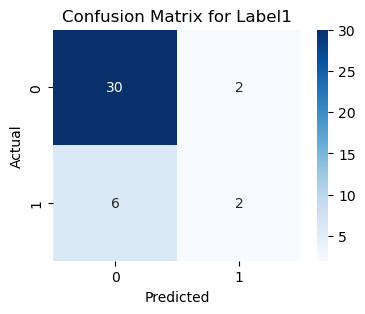

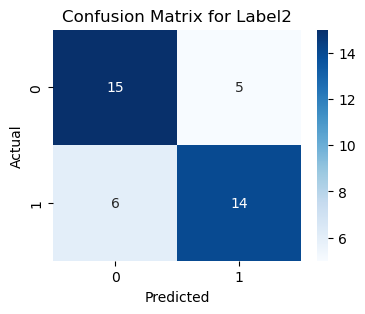

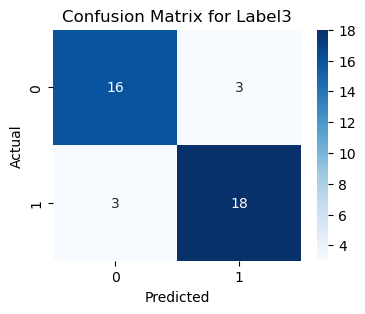

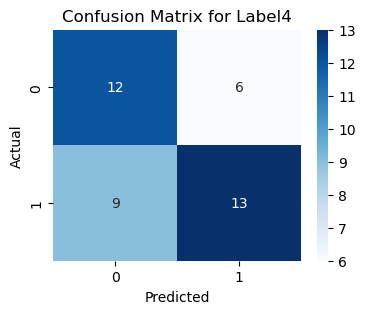

In [28]:
for i, label in enumerate(y.columns):
    cm = confusion_matrix(y_test[label], y_pred[:, i])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix for {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()